## Descriptive Analytics

In [ ]:
import pandas as pd

## 1. Data Loading & Initial Preparation

In [ ]:
df = pd.read_csv('fraud test.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


## 2. Exploratory Checks (Supporting EDA)

**Extracting age based on the transaction date in each row (trans_date_trans_time) and dob (date of birth)**

In [ ]:
# Extracting age based on the transaction date in each row (trans_date_trans_time) and dob (date of birth)

# Data Preprocessing and cleaning
# Parse 'dob' using day/month/year
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y', errors='coerce')

# Parse 'trans_date_trans_time' using full datetime format with hour and minute
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate accurate age
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Optional: more precise age
# df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Check results
df[['dob', 'trans_date_trans_time', 'age']].head()


,dob,trans_date_trans_time,age
0,1968-03-19,2020-06-21 12:14:00,52.0
1,1990-01-17,2020-06-21 12:14:00,30.0
2,1970-10-21,2020-06-21 12:14:00,50.0
3,1987-07-25,2020-06-21 12:15:00,33.0
4,1955-07-06,2020-06-21 12:15:00,65.0


In [ ]:

# Drop unnecessary and PII columns
df1 = df.drop(columns=[
    'Unnamed: 0',        # Redundant index
    'cc_num',            # Unique identifier (PII)
    'first',             # PII
    'last',              # PII
    'street',            # PII
    'trans_num',         # Unique transaction ID
    'unix_time',         # Redundant with trans_date_trans_time
    'merch_lat',         # Merchant location
    'merch_long',         # Merchant location
     'trans_date_trans_time',  # already extracted features (Timestamp won’t help directly — we’ve already extracted age)
     'dob',                    # Already used to extract age — redundant now
    'lat', 'long',            # not used in modeling. Raw coordinates rarely help unless used for clustering
    'zip', 'city'
])

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113927 entries, 0 to 113926
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   merchant  113927 non-null  object 
 1   category  113927 non-null  object 
 2   amt       113927 non-null  float64
 3   gender    113927 non-null  object 
 4   state     113926 non-null  object 
 5   city_pop  113926 non-null  float64
 6   job       113926 non-null  object 
 7   is_fraud  113926 non-null  float64
 8   age       113926 non-null  float64
dtypes: float64(4), object(5)
memory usage: 7.8+ MB


In [ ]:
# Converting 'is_fraud'
df1['is_fraud'] = df1['is_fraud'].astype('category')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113927 entries, 0 to 113926
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   merchant  113927 non-null  object  
 1   category  113927 non-null  object  
 2   amt       113927 non-null  float64 
 3   gender    113927 non-null  object  
 4   state     113926 non-null  object  
 5   city_pop  113926 non-null  float64 
 6   job       113926 non-null  object  
 7   is_fraud  113926 non-null  category
 8   age       113926 non-null  float64 
dtypes: category(1), float64(3), object(5)
memory usage: 7.1+ MB


**Data Visualization**

**Fraud Rate by Category**

<ipython-input-10-439320f691df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['is_fraud'] = df1['is_fraud'].astype(int)


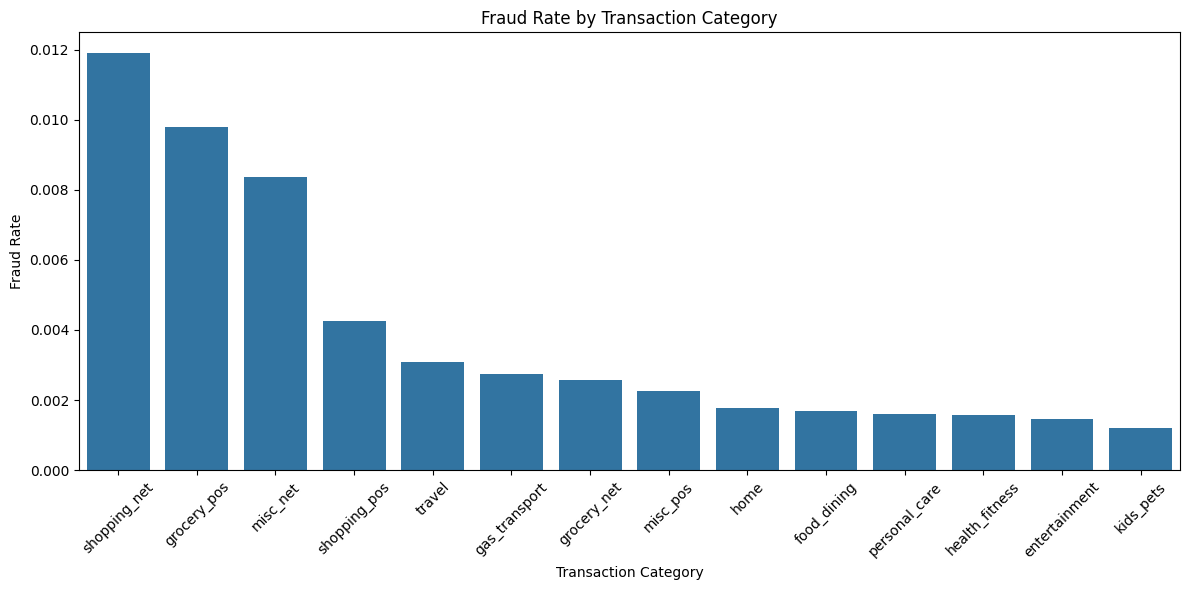

In [ ]:
# Fraud Rate by Category
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df1.dropna(subset=['is_fraud'])

# Check if 'is_fraud' is a categorical variable and convert it to int
if df1['is_fraud'].dtype == 'object' or df1['is_fraud'].dtype.name == 'category':
    df1['is_fraud'] = df1['is_fraud'].astype(int)

plt.figure(figsize=(12, 6))

# Calculate fraud rate by category
fraud_by_category = df1.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)

plt.xticks(rotation=45)
plt.title('Fraud Rate by Transaction Category')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Category')
plt.tight_layout()
plt.show()

**Fraud Rate by Gender**

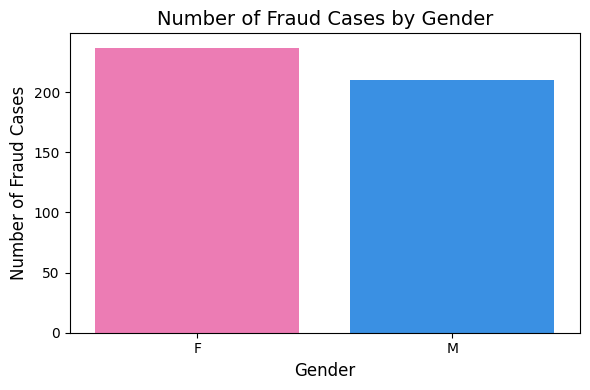

In [ ]:

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count of fraud cases by gender
fraud_counts = fraud_only['gender'].value_counts().reset_index()
fraud_counts.columns = ['gender', 'count']

# Plot with hue assigned to 'gender'
plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_counts, x='gender', y='count', hue='gender', palette=["hotpink", "dodgerblue"], legend=False)

# Improve plot aesthetics
plt.title('Number of Fraud Cases by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

**Fraud Cases by State**

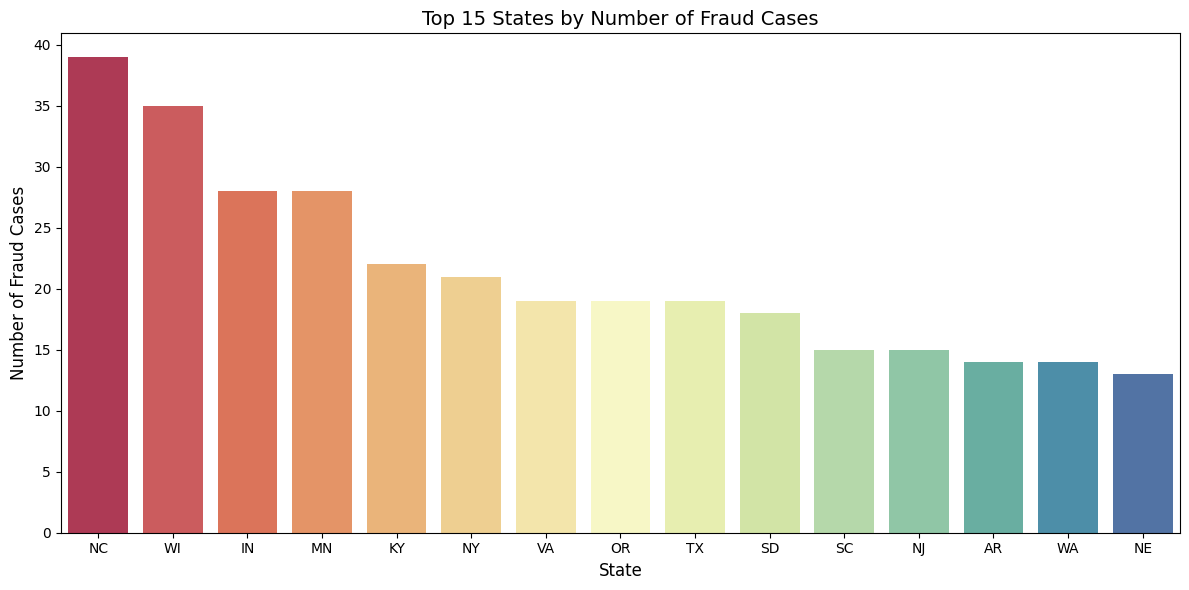

In [ ]:

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count of fraud cases by state
fraud_counts_state = fraud_only['state'].value_counts().reset_index()
fraud_counts_state.columns = ['state', 'count']

# Plot top 15 states with most fraud cases
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_counts_state.head(15), x='state', y='count', hue='state', palette='Spectral', legend=False)

# Improve plot aesthetics
plt.title('Top 15 States by Number of Fraud Cases', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


**Word Cloud of Cities with Fraud Cases**

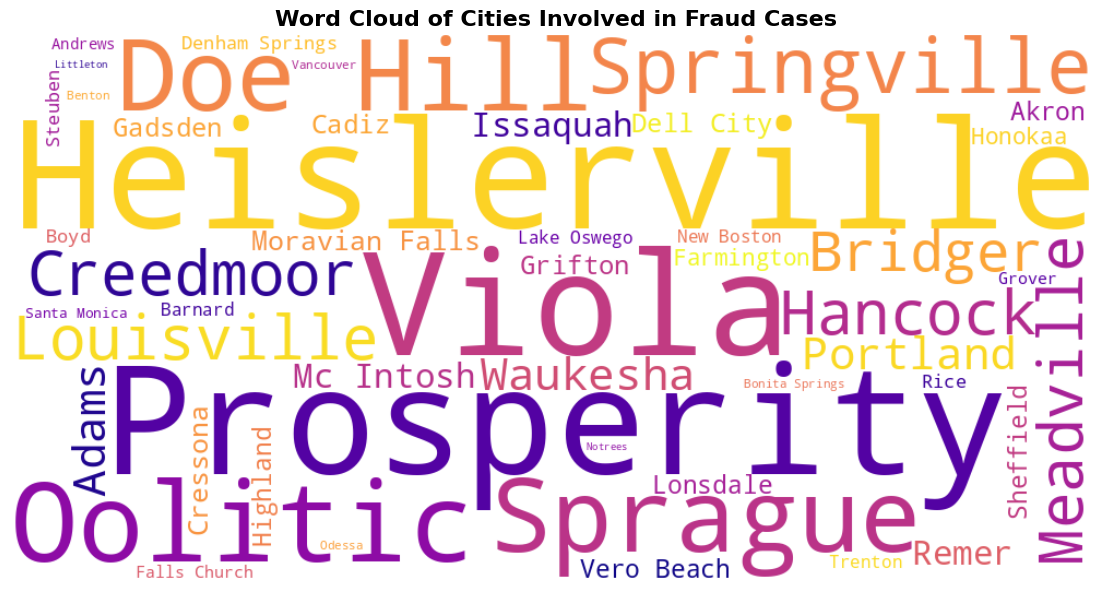

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Filter fraud transactions only
fraud_only = df[df['is_fraud'] == 1]

# Create a list of cities involved in fraud
fraud_cities = fraud_only['city'].tolist()

# Count frequency of each city
city_freq = Counter(fraud_cities)

# Generate word cloud
fraud_city_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(city_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(fraud_city_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cities Involved in Fraud Cases', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


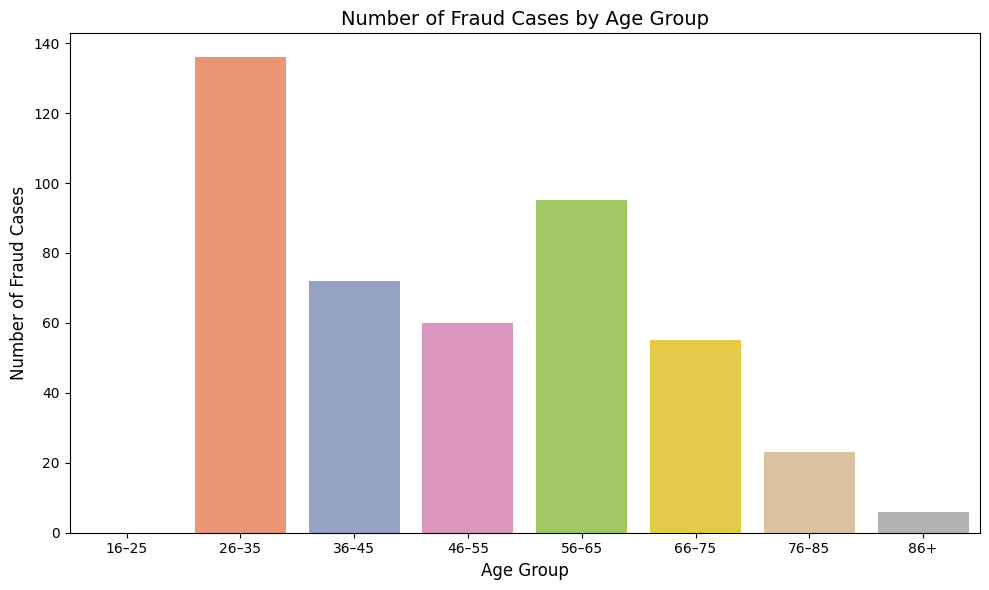

In [ ]:
# Define age bins and labels
bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['16–25', '26–35', '36–45', '46–55', '56–65', '66–75', '76–85', '86+']

# Create age group column
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=True)

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count fraud cases in each age group
fraud_by_age_group = fraud_only['age_group'].value_counts().sort_index().reset_index()
fraud_by_age_group.columns = ['age_group', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_by_age_group, x='age_group', y='count', hue='age_group', palette='Set2', legend=False)

# Improve aesthetics
plt.title('Number of Fraud Cases by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


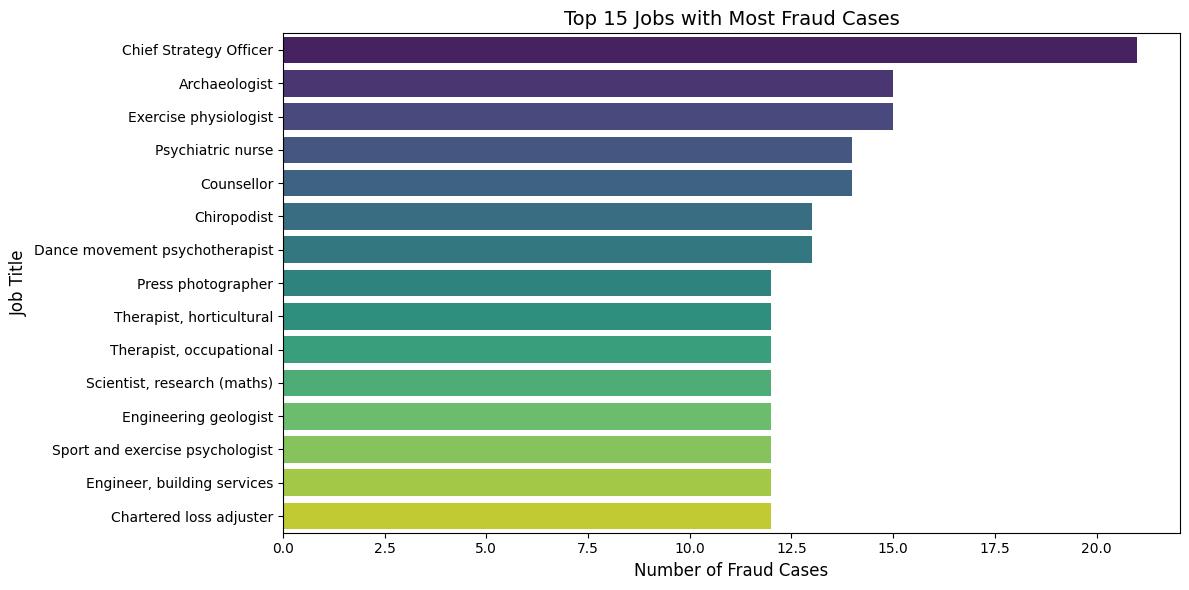

In [ ]:
# Top 15 Jobs with the Most Fraud Cases

# Filter fraud cases
fraud_only = df1[df1['is_fraud'] == 1]

# Count fraud cases by job
fraud_by_job = fraud_only['job'].value_counts().head(15).reset_index()
fraud_by_job.columns = ['job', 'count']
fraud_by_job['hue'] = fraud_by_job['job']  # Dummy hue for color mapping

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_job,
    x='count',
    y='job',
    hue='hue',
    palette='viridis',
    legend=False
)

# Improve styling
plt.title('Top 15 Jobs with Most Fraud Cases', fontsize=14)
plt.xlabel('Number of Fraud Cases', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Converting data to appropriate data types

df1['age'] = df1['age'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113926 entries, 0 to 113925
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   merchant   113926 non-null  object  
 1   category   113926 non-null  object  
 2   amt        113926 non-null  float64 
 3   gender     113926 non-null  object  
 4   state      113926 non-null  object  
 5   city_pop   113926 non-null  float64 
 6   job        113926 non-null  object  
 7   is_fraud   113926 non-null  int64   
 8   age        113926 non-null  int64   
 9   age_group  113689 non-null  category
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 8.8+ MB


In [ ]:
# Renaming df1 for predictive modeling

df_model= df1
df_model.head(10)

,merchant,category,amt,gender,state,city_pop,job,is_fraud,age,age_group
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,333497.0,Mechanical engineer,0,52,46–55
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,302.0,"Sales professional, IT",0,30,26–35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,34496.0,"Librarian, public",0,50,46–55
3,fraud_Haley Group,misc_pos,60.05,M,FL,54767.0,Set designer,0,33,26–35
4,fraud_Johnston-Casper,travel,3.19,M,MI,1126.0,Furniture designer,0,65,56–65
5,fraud_Daugherty LLC,kids_pets,19.55,F,NY,520.0,Psychotherapist,0,29,26–35
6,fraud_Romaguera Ltd,health_fitness,133.93,F,CA,1139.0,"Therapist, occupational",0,69,66–75
7,fraud_Reichel LLC,personal_care,10.37,F,SD,343.0,"Development worker, international aid",0,48,46–55
8,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,PA,3688.0,Advice worker,0,47,46–55
9,fraud_Kilback Group,food_dining,66.54,F,TX,263.0,Barrister,0,64,56–65


In [ ]:
# Drop selected columns
df_reduced = df_model.drop(columns=['merchant', 'job', 'age_group']) # 'gender'

# Check result
df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113926 entries, 0 to 113925
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  113926 non-null  object 
 1   amt       113926 non-null  float64
 2   gender    113926 non-null  object 
 3   state     113926 non-null  object 
 4   city_pop  113926 non-null  float64
 5   is_fraud  113926 non-null  int64  
 6   age       113926 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [ ]:
# Make sure the datetime column is in correct format in original df
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extract time-based features from df
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = df['trans_dayofweek'].isin([5, 6]).astype(int)

# Optional hour band
def hour_band(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['hour_band'] = df['trans_hour'].apply(hour_band)

# Merge time features into df_reduced
df_reduced = df_reduced.copy()
df_reduced['trans_hour'] = df['trans_hour']
df_reduced['trans_dayofweek'] = df['trans_dayofweek']
df_reduced['is_weekend'] = df['is_weekend']
df_reduced['hour_band'] = df['hour_band']
df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113926 entries, 0 to 113925
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         113926 non-null  object 
 1   amt              113926 non-null  float64
 2   gender           113926 non-null  object 
 3   state            113926 non-null  object 
 4   city_pop         113926 non-null  float64
 5   is_fraud         113926 non-null  int64  
 6   age              113926 non-null  int64  
 7   trans_hour       113926 non-null  int32  
 8   trans_dayofweek  113926 non-null  int32  
 9   is_weekend       113926 non-null  int64  
 10  hour_band        113926 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(4)
memory usage: 9.6+ MB


**Visualize the number of fraud cases by hour_band, so we can see if fraud is more common during Morning, Afternoon, Evening, or Night**

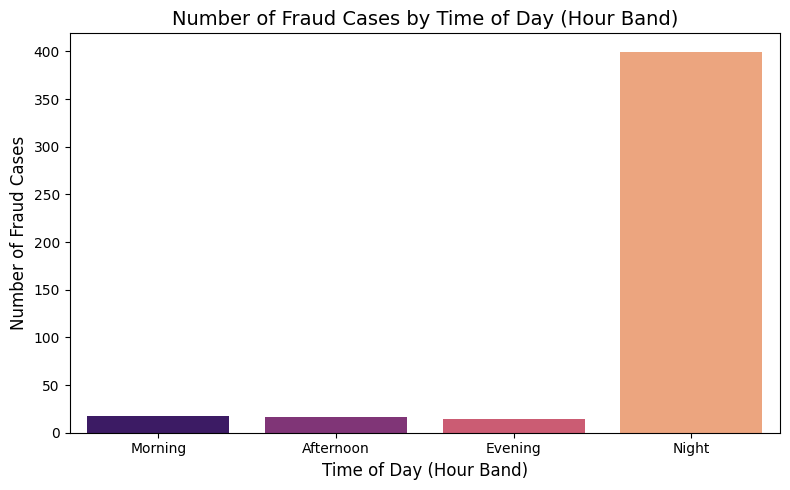

In [ ]:
# Visualize the number of fraud cases by hour_band, so you can see if fraud is more common during Morning, Afternoon, Evening, or Night

# Filter only fraud cases
fraud_only = df_reduced[df_reduced['is_fraud'] == 1]

# Count frauds per hour_band and convert to DataFrame
fraud_by_hour_band = fraud_only['hour_band'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night']).reset_index()
fraud_by_hour_band.columns = ['hour_band', 'count']

# Plot with hue based on hour_band
plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_by_hour_band, x='hour_band', y='count', hue='hour_band', palette='magma', legend=False)

# Customize plot
plt.title('Number of Fraud Cases by Time of Day (Hour Band)', fontsize=14)
plt.xlabel('Time of Day (Hour Band)', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## 3. ML Models

### Feature Engineering
Model Features were limited to only categorical variables that could be transformed to binary and categorical variables. The categories with high cardinality were taken out because they reduced the performance of most models. Encoding was performed for State, and Category but only reduced the efficacy of the models.

In [ ]:
#Drop NaN from Outcome variable
df_reduced = df_reduced.dropna(subset= 'is_fraud')

#Change Df from visulization and cleaning step to "Models Data Frame"
mod_df = df_reduced.drop(columns=['hour_band','category','state'])

#Convert Outcome variable to integer since model performance benefits from int rather than cat or bool
mod_df['is_fraud'] = df_reduced['is_fraud'].astype('int')

#Map 1 and 0 to gender for better model performance and convert to int
mod_df['gender'] = df_reduced['gender'].map({'M': 1, 'F': 0})
mod_df['gender'] = mod_df['gender'].astype('int')

In [ ]:
#Display Final Variables
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113926 entries, 0 to 113925
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   amt              113926 non-null  float64
 1   gender           113926 non-null  int64  
 2   city_pop         113926 non-null  float64
 3   is_fraud         113926 non-null  int64  
 4   age              113926 non-null  int64  
 5   trans_hour       113926 non-null  int32  
 6   trans_dayofweek  113926 non-null  int32  
 7   is_weekend       113926 non-null  int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 7.0 MB


### Decision Tree

 This model was optimized using Grid Search technique to check for the best parameters for impurity, max depth, and sample split on the pruned model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Drop NaN value from y variable and define x and y
x = mod_df.drop(columns = ['is_fraud'])
y = mod_df['is_fraud']

## 4. Train & Test Split and Class Imbalance Handling

In [ ]:
#Establish Oversample and Undersample techniques
os = SMOTE(random_state=42)
us = RandomUnderSampler(random_state=42, sampling_strategy='majority')

#Split Train and Valid
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.2, random_state=42)

#Split training for under and oversample
xtrainos, ytrainos = os.fit_resample(xtrain, ytrain)
xtrainus, ytrainus = us.fit_resample(xtrain, ytrain)

In [ ]:
#With no pruning do decision tree classifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)
dtpred = dt.predict(xvalid)
print(classification_report(yvalid, dtpred))

print('Oversampled')
dtos = DecisionTreeClassifier(random_state=42)
dtos.fit(xtrainos, ytrainos)
dtpredos = dtos.predict(xvalid)
print(classification_report(yvalid, dtpredos))

print('Undersampled')
dtus = DecisionTreeClassifier(random_state=42)
dtus.fit(xtrainus, ytrainus)
dtpredus = dtus.predict(xvalid)
print(classification_report(yvalid, dtpredus))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.53      0.48      0.51        87

    accuracy                           1.00     22786
   macro avg       0.76      0.74      0.75     22786
weighted avg       1.00      1.00      1.00     22786

Oversampled
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22699
           1       0.20      0.69      0.30        87

    accuracy                           0.99     22786
   macro avg       0.60      0.84      0.65     22786
weighted avg       1.00      0.99      0.99     22786

Undersampled
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     22699
           1       0.03      0.86      0.06        87

    accuracy                           0.89     22786
   macro avg       0.51      0.88      0.50     22786
weighted avg       1.00      0.89      0.94     2

In [ ]:
#Determine the best parameters to use in the pruned version.

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

Grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
Grid.fit(xtrain, ytrain)

#Print best score (which is the best mean cross validated score found during the search)
print(f'Initial Score: {Grid.best_score_}')
#Print the best parameters
print(f'Initial Params: {Grid.best_params_}')

Initial Score: 0.996774193548387
Initial Params: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [ ]:
#Pruned Predictions using best parameters
print('Original')
dt_prune = DecisionTreeClassifier(random_state=42, **Grid.best_params_)
dt_prune.fit(xtrain, ytrain)
dt_prune_predict = dt_prune.predict(xvalid)
print(classification_report(yvalid, dt_prune_predict))

print('Oversmaple')
dt_pruneos = DecisionTreeClassifier(random_state=42, **Grid.best_params_)
dt_pruneos.fit(xtrainos, ytrainos)
dtos_prune_predictos = dt_pruneos.predict(xvalid)
print(classification_report(yvalid, dtos_prune_predictos))

print('Undersample')
dt_pruneus = DecisionTreeClassifier(random_state=42, **Grid.best_params_)
dt_pruneus.fit(xtrainus, ytrainus)
dtos_prune_predictus = dt_pruneus.predict(xvalid)
print(classification_report(yvalid, dtos_prune_predictus))

Original
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.68      0.45      0.54        87

    accuracy                           1.00     22786
   macro avg       0.84      0.72      0.77     22786
weighted avg       1.00      1.00      1.00     22786

Oversmaple
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     22699
           1       0.04      0.79      0.08        87

    accuracy                           0.93     22786
   macro avg       0.52      0.86      0.52     22786
weighted avg       1.00      0.93      0.96     22786

Undersample
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     22699
           1       0.04      0.84      0.07        87

    accuracy                           0.92     22786
   macro avg       0.52      0.88      0.52     22786
weighted avg       1.00      0.92      0.9

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(xtrain, ytrain)
bagging_pred = bagging.predict(xvalid)
pred = bagging.predict(xvalid)
print(classification_report(yvalid, pred))

print('-'*60)
print('Oversampled')

overbag = BaggingClassifier(n_estimators=100, random_state=42)
overbag.fit(xtrainos, ytrainos)
overbag_pred = overbag.predict(xvalid)
print(classification_report(yvalid, overbag_pred))


underbag = BaggingClassifier(n_estimators=100, random_state=42)
underbag.fit(xtrainus, ytrainus)
underbag_pred = underbag.predict(xvalid)
print(classification_report(yvalid, underbag_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.84      0.49      0.62        87

    accuracy                           1.00     22786
   macro avg       0.92      0.75      0.81     22786
weighted avg       1.00      1.00      1.00     22786

------------------------------------------------------------
Oversampled
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22699
           1       0.26      0.70      0.38        87

    accuracy                           0.99     22786
   macro avg       0.63      0.85      0.69     22786
weighted avg       1.00      0.99      0.99     22786

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22699
           1       0.04      0.91      0.07        87

    accuracy                           0.91     22786
   macro avg       0.52      0.91      0.51     22786
w

### Boosting

In [ ]:
ada_og = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_og.fit(xtrain, ytrain)
ada_og_pred = ada_og.predict(xvalid)
print(classification_report(yvalid, ada_og_pred))

ada_os = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_os.fit(xtrainos, ytrainos)
ada_os_pred = ada_os.predict(xvalid)
print(classification_report(yvalid, ada_os_pred))

ada_us = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_us.fit(xtrainus, ytrainus)
ada_us_pred = ada_us.predict(xvalid)
print(classification_report(yvalid, ada_us_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.71      0.28      0.40        87

    accuracy                           1.00     22786
   macro avg       0.85      0.64      0.70     22786
weighted avg       1.00      1.00      1.00     22786

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     22699
           1       0.05      0.75      0.09        87

    accuracy                           0.94     22786
   macro avg       0.52      0.85      0.53     22786
weighted avg       1.00      0.94      0.97     22786

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     22699
           1       0.04      0.87      0.08        87

    accuracy                           0.92     22786
   macro avg       0.52      0.90      0.52     22786
weighted avg       1.00      0.92      0.96     22786



### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xvalid)
print(classification_report(yvalid, rf_pred))

rf_os = RandomForestClassifier(n_estimators=100, random_state=42)
rf_os.fit(xtrainos, ytrainos)
rf_os_pred = rf_os.predict(xvalid)
print(classification_report(yvalid, rf_os_pred))

rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
rf_us.fit(xtrainus, ytrainus)
rf_us_pred = rf_us.predict(xvalid)
print(classification_report(yvalid, rf_us_pred))
#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.95      0.47      0.63        87

    accuracy                           1.00     22786
   macro avg       0.98      0.74      0.81     22786
weighted avg       1.00      1.00      1.00     22786

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22699
           1       0.33      0.68      0.44        87

    accuracy                           0.99     22786
   macro avg       0.66      0.84      0.72     22786
weighted avg       1.00      0.99      0.99     22786

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22699
           1       0.04      0.90      0.07        87

    accuracy                           0.91     22786
   macro avg       0.52      0.90      0.51     22786
weighted avg       1.00      0.91      0.95     22786



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb_pred = gnb.predict(xvalid)
print(classification_report(yvalid, gnb_pred))

gnb_os = GaussianNB()
gnb_os.fit(xtrainos, ytrainos)
gnb_os_pred = gnb_os.predict(xvalid)
print(classification_report(yvalid, gnb_os_pred))

gnb_us = GaussianNB()
gnb_us.fit(xtrainus, ytrainus)
gnb_us_pred = gnb_us.predict(xvalid)
print(classification_report(yvalid, gnb_us_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22699
           1       0.22      0.40      0.29        87

    accuracy                           0.99     22786
   macro avg       0.61      0.70      0.64     22786
weighted avg       0.99      0.99      0.99     22786

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22699
           1       0.10      0.66      0.18        87

    accuracy                           0.98     22786
   macro avg       0.55      0.82      0.58     22786
weighted avg       1.00      0.98      0.99     22786

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22699
           1       0.09      0.67      0.16        87

    accuracy                           0.97     22786
   macro avg       0.55      0.82      0.58     22786
weighted avg       1.00      0.97      0.98     22786



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113926 entries, 0 to 113925
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   amt              113926 non-null  float64
 1   gender           113926 non-null  int64  
 2   city_pop         113926 non-null  float64
 3   age              113926 non-null  int64  
 4   trans_hour       113926 non-null  int32  
 5   trans_dayofweek  113926 non-null  int32  
 6   is_weekend       113926 non-null  int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 6.1 MB


In [ ]:
#Scaled data in this step so that logistic regression and Neural Network would perform better
preprocessor = ColumnTransformer([('scale_cont', StandardScaler(),
    [
    'amt', 'city_pop', 'age','trans_hour','trans_dayofweek'
    ]),
], remainder='passthrough')

x_scaled = preprocessor.fit_transform(x)

#Establish Oversample and Undersample techniques
os = SMOTE(random_state=42)
us = RandomUnderSampler(random_state=42, sampling_strategy='majority')

#Split Train and Valid
xtrain, xvalid, ytrain, yvalid = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#Split training for under and oversample
xtrainos, ytrainos = os.fit_resample(xtrain, ytrain)
xtrainus, ytrainus = us.fit_resample(xtrain, ytrain)

In [ ]:
print('original')
lr = LogisticRegressionCV(cv=5, random_state=42)
lr.fit(xtrain, ytrain)
lrpred = lr.predict(xvalid)
print(classification_report(yvalid, lrpred))

print('undersample')
lrus = LogisticRegressionCV(cv=5, random_state=42)
lrus.fit(xtrainus, ytrainus)
lrpredus = lrus.predict(xvalid)
print(classification_report(yvalid, lrpredus))

print('oversample')
lros = LogisticRegressionCV(cv=5, random_state=42)
lros.fit(xtrainos, ytrainos)
lrpredos = lros.predict(xvalid)
print(classification_report(yvalid, lrpredos))

original


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.00      0.00      0.00        87

    accuracy                           1.00     22786
   macro avg       0.50      0.50      0.50     22786
weighted avg       0.99      1.00      0.99     22786

undersample
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     22699
           1       0.05      0.69      0.10        87

    accuracy                           0.95     22786
   macro avg       0.52      0.82      0.53     22786
weighted avg       1.00      0.95      0.97     22786

oversample
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22699
           1       0.06      0.69      0.12        87

    accuracy                           0.96     22786
   macro avg       0.53      0.83      0.55     22786
weighted avg       1.00      0.96      0.98     227

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
print('Original')
NN = MLPClassifier(hidden_layer_sizes= (4,5,10), activation= 'relu', solver= 'adam', max_iter=500)
NN.fit(xtrain, ytrain)
pred = NN.predict(xvalid)
print(classification_report(yvalid, pred))

print('-'*60)
print('Oversampled')
NNos = MLPClassifier(hidden_layer_sizes= (4,5,10), activation= 'relu', solver= 'adam', max_iter=500)
NNos.fit(xtrainos, ytrainos)
predos = NNos.predict(xvalid)
print(classification_report(yvalid, predos))

print('-'*60)
print('Undersampled')
NNus = MLPClassifier(hidden_layer_sizes= (4,5,10), activation= 'relu', solver= 'adam', max_iter=500)
NNus.fit(xtrainus, ytrainus)
predus = NNus.predict(xvalid)
print(classification_report(yvalid, predus))

Original
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22699
           1       0.60      0.03      0.07        87

    accuracy                           1.00     22786
   macro avg       0.80      0.52      0.53     22786
weighted avg       0.99      1.00      0.99     22786

------------------------------------------------------------
Oversampled
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     22699
           1       0.04      0.84      0.07        87

    accuracy                           0.92     22786
   macro avg       0.52      0.88      0.52     22786
weighted avg       1.00      0.92      0.95     22786

------------------------------------------------------------
Undersampled
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     22699
           1       0.02      0.80      0.05        87

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
